In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

# Now, I will read the stored audio file. It will return two values: the sampling frequency and the audio signal.

In [2]:
frequency_sampling, audio_signal = wavfile.read("C:/Users/Dell/PycharmProjects/pythonProject/speech recognition/audio_files_harvard.wav")

 Now, I will display the parameters like sampling frequency of the audio signal, data type of signal and its duration, using the commands shown −

In [3]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')


Signal shape: (809508, 2)
Signal Datatype: int16
Signal duration: 18.36 seconds


# We will normalize the signal

In [4]:
audio_signal = audio_signal / np.power(2, 15)

In this step, I will extract the first 100 values from this signal to visualize. Use the following commands for this purpose −

In [5]:
audio_signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

Now, I will visualize the signal using the commands given below −

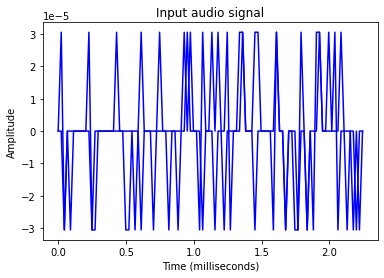

In [6]:
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

# Feature Extraction from Speech

This is the most important step in building a speech recognizer because after converting the speech signal into the frequency domain, we must convert it into the usable form of feature vector. We can use different feature extraction techniques like MFCC, PLP, PLP-RASTA etc. for this purpose.

Then, I extracted the features from signal, step-by-step, using Python, by using MFCC technique.

Import the necessary packages.

In [7]:
!pip install python_speech_features

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

Note thatI will take first 15000 samples for analysis.

In [9]:
audio_signal = audio_signal[:15000]

I used the MFCC techniques and execute the following command to extract the MFCC features −

In [10]:
features_mfcc = mfcc(audio_signal, frequency_sampling)

Now, print the MFCC parameters, as shown −

In [11]:
print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])


MFCC:
Number of windows = 1
Length of each feature = 13


Now, plot and visualize the MFCC features using the commands given below −

Text(0.5, 1.0, 'MFCC')

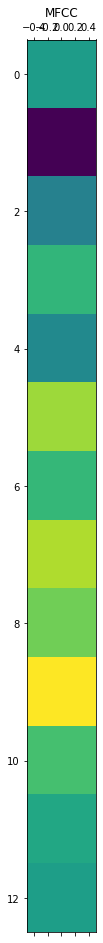

In [12]:
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC')

In this step, I will work with the filter bank features as shown −

Extract the filter bank features −

In [13]:
filterbank_features = logfbank(audio_signal, frequency_sampling)

Now, print the filterbank parameters.

In [14]:
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])


Filter bank:
Number of windows = 1
Length of each feature = 26


Now, plot and visualize the filterbank features.

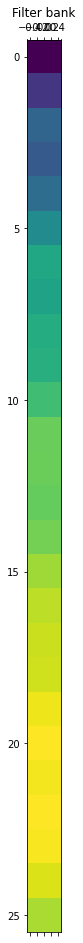

In [15]:
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()

Recognition of Spoken Words
Speech recognition means that when humans are speaking, a machine understands it. Here we are using Google Speech API in Python to make it happen. We need to install the following packages for this −

Pyaudio − It can be installed by using pip install Pyaudio command.

SpeechRecognition − This package can be installed by using pip install SpeechRecognition.

Google-Speech-API − It can be installed by using the command pip install google-api-python-client.

Import the necessary packages as shown −

In [16]:
!pip install pipwin
#pipwin install pyaudio

In [17]:
!pipwin install pyaudio

Package `pyaudio` found in cache
https://download.lfd.uci.edu/pythonlibs/y2rycu7g/PyAudio-0.2.11-cp38-cp38-win_amd64.whl
PyAudio-0.2.11-cp38-cp38-win_amd64.whl
[*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 110 kB @ 0 bytes/s [--------------

In [18]:
#!pip install SpeechRecognition

In [19]:
!pip install winSpeech

In [20]:
!pip install SpeechRecognition

In [21]:
!pip install --upgrade google-api-python-client



Requirement already up-to-date: google-api-python-client in c:\users\dell\anaconda3\lib\site-packages (2.22.0)


In [22]:
import speech_recognition as sr

In [34]:
r = sr.Recognizer()

In [35]:
recording = sr.AudioFile('audio_files_harvard.wav')

Now, the Microphone() module will take the voice as input −

In [36]:
with recording as source:
     audio = r.record(source)

In [37]:
 r.recognize_google(audio)

'the still smell of old beer drinkers it takes hi to bring out the order I called it yourself invest a salt a kotess find the M tacos Al pastor my favourite is just for food is Bihar cross bun'

In [39]:
r.recognize_google(audio, language = "bn-BD")
       


'বেস্ট অফ স্মেল অফ অভেঙ্গেরস 2019'

In [41]:
with recording as source:
     audio1 = r.record(source,duration=3)

In [42]:
r.recognize_google(audio1)

'the still smell of old'

In [43]:
r.recognize_google(audio1,language = "bn-BD")

'ডিসটেন্স ম্যাপ'

In [44]:
with recording as source:
    audio2 = r.record(source,duration=4)
    audio3 = r.record(source,duration=4)

In [46]:
r.recognize_google(audio2)


'the still smell of old beer drinkers'

In [48]:
r.recognize_google(audio3)

'ethics he to bring out the order I called it'

In [49]:
with recording as source:
    audio4 = r.record(source,offset=4,duration=4)
   

In [50]:
r.recognize_google(audio4)

'ethics he to bring out the order I called it'

In [53]:
with recording as source:
    r.adjust_for_ambient_noise(source,duration=0.5)
    audio = r.record(source)

In [54]:
r.recognize_google(audio)

'the still smell of old beer drinkers it takes hi to bring out the order I called it yourself invest a salt a kotess find him because of my favourite is just for food is Bihar trust ban'

In [55]:
r.recognize_google(audio,show_all=True)

{'alternative': [{'transcript': 'the still smell of old beer drinkers it takes hi to bring out the order I called it yourself invest a salt a kotess find him because of my favourite is just for food is Bihar trust ban',
   'confidence': 0.8653245},
  {'transcript': 'the still smell of old beer drinkers it takes hi to bring out the order I call this research helps in West a salt a kotess find him because of my favourite is just for food is Bihar trust ban'},
  {'transcript': 'the still smell of old beer drinkers it takes hi to bring out the order I call dip restore selfinvest a salt a kotess find him because of my favourite is just for food is Bihar trust ban'},
  {'transcript': 'the still smell of old beer drinkers it takes hi to bring out the order I called up restore selfinvest a salt a kotess find him because of my favourite is just for food is Bihar trust ban'},
  {'transcript': 'but still smell old beer drinkers it takes hi to bring out the order I called it yourself invest a salt